<a href="https://colab.research.google.com/github/excellent-1/Python_pulling_Risk_Factor_data/blob/main/Python_pulling_Risk_Factor_data_to_estimate_Factor_Sensitivity_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will estimate the Fama French Carhart four factor risk model exposures for an arbitrary stock using live data. Utilize Python to pull in live data from Yahoo Finance and Fama-French risk factor database. I am running a factor sensitivity estimation using linear regression.

In [175]:
import pandas_datareader as pd_reader # Package with access to Financial data sets
import matplotlib.pyplot as py_plot # A plotting tool
pd_reader.famafrench.get_available_datasets() # List of available datasets from the famafrench api
startdate_of_ff_data = '1926-01-01'
famafrench_data = pd_reader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=startdate_of_ff_data).read()

<ipython-input-175-a77566b4eb30>:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  famafrench_data = pd_reader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=startdate_of_ff_data).read()
<ipython-input-175-a77566b4eb30>:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  famafrench_data = pd_reader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=startdate_of_ff_data).read()


In [176]:
print('\n ------------ Print out of Fama French Data ------------')
famafrench_data


 ------------ Print out of Fama French Data ------------


{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2024-04   -4.67 -2.39 -0.52  0.47
 2024-05    4.34  0.78 -1.66  0.44
 2024-06    2.77 -3.06 -3.31  0.41
 2024-07    1.24  6.80  5.73  0.45
 2024-08    1.61 -3.55 -1.12  0.48
 
 [1178 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2019   28.28  -6.13 -10.37  2.15
 2020   23.66  12.72 -46.10  0.45
 2021   23.57  -3.78  25.39  0.04
 2022  -21.58  -7.04  25.97  1.43
 2023   21.68  -3.29 -13.70  4.95
 
 [97 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [177]:
print('\n ------------ Print out of Fama French Data[0] ------------')
famafrench_data_index0_IsFrameOfReturns = famafrench_data[0]
famafrench_data_index0_IsFrameOfReturns


 ------------ Print out of Fama French Data[0] ------------


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2024-04,-4.67,-2.39,-0.52,0.47
2024-05,4.34,0.78,-1.66,0.44
2024-06,2.77,-3.06,-3.31,0.41



 ------------ Plot out of Fama French Data ------------


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

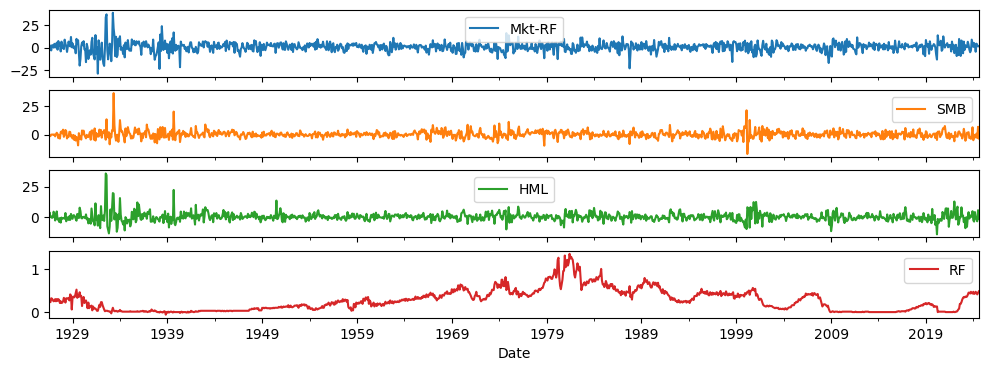

In [178]:
print('\n ------------ Plot out of Fama French Data ------------')
famafrench_data_index0_IsFrameOfReturns.plot(subplots=True, figsize=(12, 4)) # Plot series of Data Frame


 -------- Plot out of Fama French Data - Over a 72 month Rolling window we will take an mean() average calculations to smooth out.
 An instance of Window is returned if win_type is passed. Otherwise, an instance of Rolling is returned. ---------


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

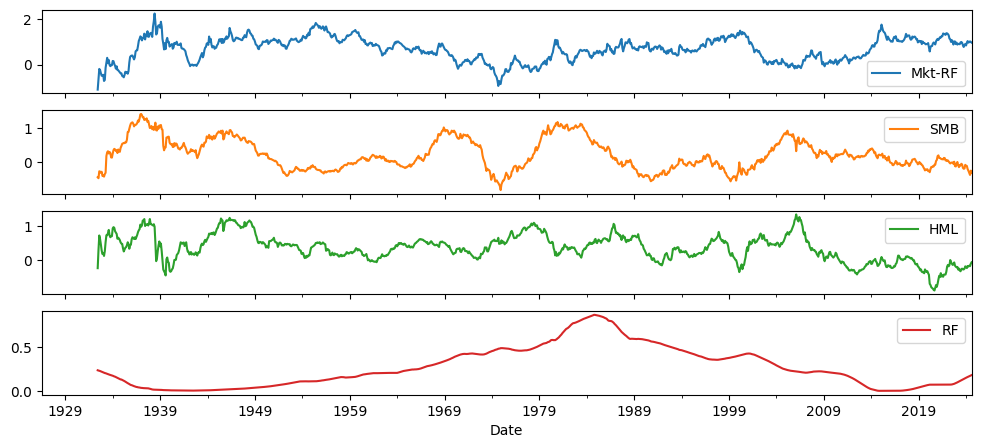

In [179]:
print('\n -------- Plot out of Fama French Data - Over a 72 month Rolling window we will take an mean() average calculations to smooth out.'
    + '\n An instance of Window is returned if win_type is passed. Otherwise, an instance of Rolling is returned. ---------')
famafrench_data_index0_IsFrameOfReturns.rolling(72).mean().plot(subplots=True, figsize=(12, 5)) # Plot series of Data Frame over a 72 month Rolling window we will take an mean() average

In [180]:
# Add the Momentum Factor
famafrench_momentum_dataframe = pd_reader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=startdate_of_ff_data).read()[0]
famafrench_momentum_dataframe

<ipython-input-180-4f4a7e93bd47>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  famafrench_momentum_dataframe = pd_reader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=startdate_of_ff_data).read()[0]
<ipython-input-180-4f4a7e93bd47>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  famafrench_momentum_dataframe = pd_reader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=startdate_of_ff_data).read()[0]


,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2024-04,-0.42
2024-05,-0.02
2024-06,0.90



 -------- Plot out of Fama French Data - Over a 72 month Rolling window we will take an mean() average calculations to smooth out.
 An instance of Window is returned if win_type is passed. Otherwise, an instance of Rolling is returned. ---------


array([<Axes: xlabel='Date'>], dtype=object)

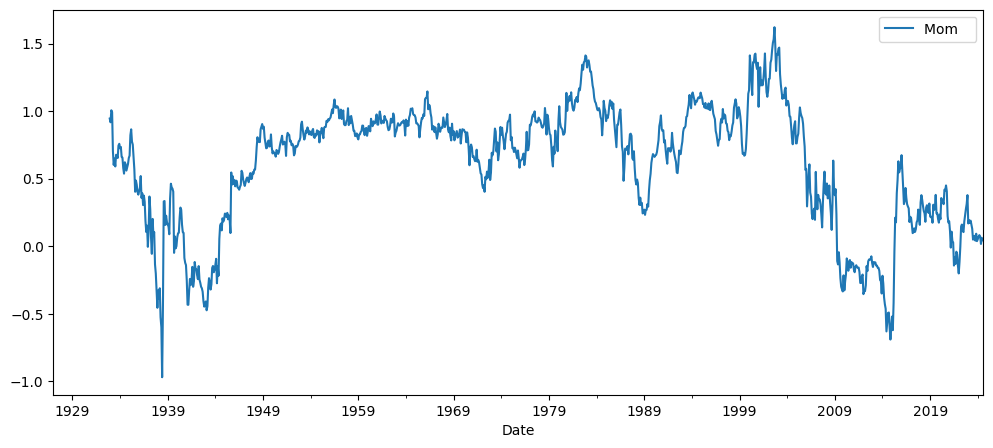

In [181]:
print('\n -------- Plot out of Fama French Data - Over a 72 month Rolling window we will take an mean() average calculations to smooth out.'
    + '\n An instance of Window is returned if win_type is passed. Otherwise, an instance of Rolling is returned. ---------')
famafrench_momentum_dataframe.rolling(72).mean().plot(subplots=True, figsize=(12, 5)) # Plot momentum Data Frame over a 72 month Rolling window we will take an mean() average

In [182]:
#ffac_mergeed_dataframe = pd_reader.merge(famafrench_data_index0_IsFrameOfReturns, famafrench_momentum_dataframe, left_index=True, right_index=True)
import pandas as pd
#ffac_mergeed_dataframe = pd.merge(famafrench_data_index0_IsFrameOfReturns, famafrench_momentum_dataframe, left_index=True, right_index=True)
ffac_mergeed_dataframe = pd.merge(famafrench_data_index0_IsFrameOfReturns, famafrench_momentum_dataframe, on='Date', how='inner',sort=True, copy=True, indicator=False, validate='one_to_one')
ffac_mergeed_dataframe # merged on the date

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2024-04,-4.67,-2.39,-0.52,0.47,-0.42
2024-05,4.34,0.78,-1.66,0.44,-0.02
2024-06,2.77,-3.06,-3.31,0.41,0.90


In [183]:
#citi_df = pd_reader.get_data_yahoo('C', start=startdate_of_ff_data)['Adj Close'].resample('M').ffill().pct_change()
#citi_df = pd_reader.DataReader('C', 'yahoo', startdate_of_ff_data)['Adj Close'].resample('M').ffill().pct_change()
# ERROR:  AttributeError: 'NoneType' object has no attribute 'group'
# pip install yfinance  NOT NEEDED
import yfinance as yf
citi_data = yf.download('C', start=startdate_of_ff_data)['Adj Close'].resample('M').ffill().pct_change()
citi_df = citi_data.to_frame()
citi_df

[*********************100%***********************]  1 of 1 completed
<ipython-input-183-2ecae10b2a99>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  citi_data = yf.download('C', start=startdate_of_ff_data)['Adj Close'].resample('M').ffill().pct_change()


,Adj Close
Date,
1977-01-31,NaN
1977-02-28,0.006472
1977-03-31,0.009647
1977-04-30,0.012738
1977-05-31,0.000000
...,...
2024-06-30,0.018456
2024-07-31,0.022376
2024-08-31,-0.025235


array([<Axes: xlabel='Date'>], dtype=object)

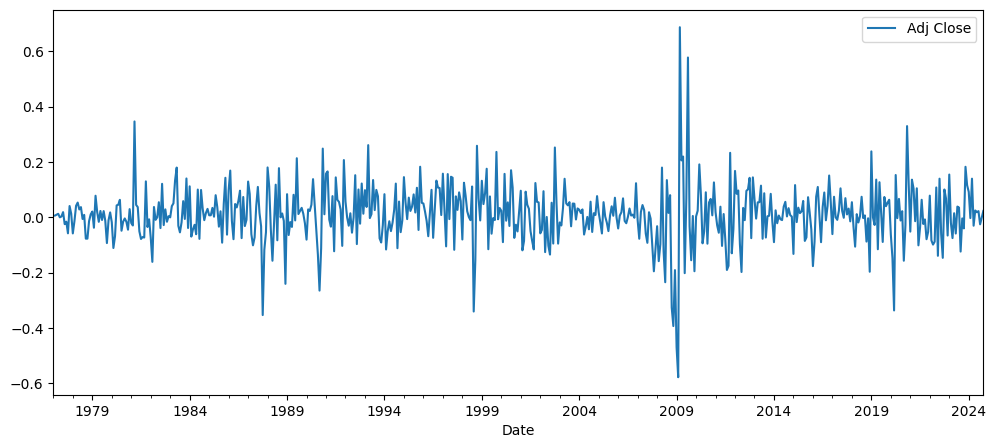

In [184]:
citi_df.plot(subplots=True, figsize=(12, 5))

In [185]:
citi_df.index.dtype

dtype('<M8[ns]')

In [186]:
ffac_mergeed_dataframe.index.dtype
# These two DF data types DO NOT MATCH

period[M]

In [187]:
citi_df['str_date'] = citi_df.index.astype(str)
citi_df['dt_date'] = pd.to_datetime(citi_df['str_date']).dt.strftime('%Y-%m')
citi_df.str_date.dtype

dtype('O')

In [188]:
citi_df.dt_date.dtype

dtype('O')

In [189]:
ffac_mergeed_dataframe['str_date'] = ffac_mergeed_dataframe.index.astype(str)
ffac_mergeed_dataframe['dt_date'] = pd.to_datetime(ffac_mergeed_dataframe['str_date']).dt.strftime('%Y-%m')
ffac_mergeed_dataframe.str_date.dtype

dtype('O')

In [190]:
Citi_ffac_merged_dataframe = pd.merge(citi_df, ffac_mergeed_dataframe, on='dt_date', how='inner',sort=True, copy=True, indicator=False, validate='one_to_one')
Citi_ffac_merged_dataframe

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1977-01-31,1977-01,-4.05,4.76,4.27,0.36,4.00,1977-01
1,0.006472,1977-02-28,1977-02,-1.94,1.04,0.47,0.35,0.36,1977-02
2,0.009647,1977-03-31,1977-03,-1.37,1.00,1.09,0.38,0.55,1977-03
3,0.012738,1977-04-30,1977-04,0.15,-0.12,3.38,0.38,4.21,1977-04
4,0.000000,1977-05-31,1977-05,-1.45,1.18,0.85,0.37,2.03,1977-05
...,...,...,...,...,...,...,...,...,...
567,-0.030202,2024-04-30,2024-04,-4.67,-2.39,-0.52,0.47,-0.42,2024-04
568,0.024805,2024-05-31,2024-05,4.34,0.78,-1.66,0.44,-0.02,2024-05
569,0.018456,2024-06-30,2024-06,2.77,-3.06,-3.31,0.41,0.90,2024-06
570,0.022376,2024-07-31,2024-07,1.24,6.80,5.73,0.45,-2.42,2024-07


In [191]:
Citi_ffac_merged_dataframe.drop(columns=['str_date_x','str_date_y'], inplace=True) # Drop the str_date_x and str_date_y
Citi_ffac_merged_dataframe.rename(columns={'Adj Close': 'Citigroup Inc.'}, inplace=True) # Rename the Adj Close to Citigroup Inc.
Citi_ffac_merged_dataframe # Citigroup Inc. is in Decimal Format  but  The Risk Factors are in Percent Format

,Citigroup Inc.,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,1977-01,-4.05,4.76,4.27,0.36,4.00
1,0.006472,1977-02,-1.94,1.04,0.47,0.35,0.36
2,0.009647,1977-03,-1.37,1.00,1.09,0.38,0.55
3,0.012738,1977-04,0.15,-0.12,3.38,0.38,4.21
4,0.000000,1977-05,-1.45,1.18,0.85,0.37,2.03
...,...,...,...,...,...,...,...
567,-0.030202,2024-04,-4.67,-2.39,-0.52,0.47,-0.42
568,0.024805,2024-05,4.34,0.78,-1.66,0.44,-0.02
569,0.018456,2024-06,2.77,-3.06,-3.31,0.41,0.90
570,0.022376,2024-07,1.24,6.80,5.73,0.45,-2.42


In [192]:
# Convert the Citi column from Decimal to the same units (Percent) as and subtract the Risk Free Weight
Citi_ffac_merged_dataframe['Citi_RF'] = Citi_ffac_merged_dataframe['Citigroup Inc.'] * 100-Citi_ffac_merged_dataframe['RF'] # Add a new Risk Factor column
Citi_ffac_merged_dataframe

,Citigroup Inc.,dt_date,Mkt-RF,SMB,HML,RF,Mom,Citi_RF
0,NaN,1977-01,-4.05,4.76,4.27,0.36,4.00,NaN
1,0.006472,1977-02,-1.94,1.04,0.47,0.35,0.36,0.297239
2,0.009647,1977-03,-1.37,1.00,1.09,0.38,0.55,0.584684
3,0.012738,1977-04,0.15,-0.12,3.38,0.38,4.21,0.893830
4,0.000000,1977-05,-1.45,1.18,0.85,0.37,2.03,-0.370000
...,...,...,...,...,...,...,...,...
567,-0.030202,2024-04,-4.67,-2.39,-0.52,0.47,-0.42,-3.490239
568,0.024805,2024-05,4.34,0.78,-1.66,0.44,-0.02,2.040502
569,0.018456,2024-06,2.77,-3.06,-3.31,0.41,0.90,1.435607
570,0.022376,2024-07,1.24,6.80,5.73,0.45,-2.42,1.787631


In [193]:
Citi_ffac_merged_dataframe.dropna(axis=0, inplace=True) # Just remove the rows that contain a Missing or NaN value
Citi_ffac_merged_dataframe

,Citigroup Inc.,dt_date,Mkt-RF,SMB,HML,RF,Mom,Citi_RF
1,0.006472,1977-02,-1.94,1.04,0.47,0.35,0.36,0.297239
2,0.009647,1977-03,-1.37,1.00,1.09,0.38,0.55,0.584684
3,0.012738,1977-04,0.15,-0.12,3.38,0.38,4.21,0.893830
4,0.000000,1977-05,-1.45,1.18,0.85,0.37,2.03,-0.370000
5,0.003145,1977-06,4.71,2.09,-0.74,0.40,1.66,-0.085485
...,...,...,...,...,...,...,...,...
567,-0.030202,2024-04,-4.67,-2.39,-0.52,0.47,-0.42,-3.490239
568,0.024805,2024-05,4.34,0.78,-1.66,0.44,-0.02,2.040502
569,0.018456,2024-06,2.77,-3.06,-3.31,0.41,0.90,1.435607
570,0.022376,2024-07,1.24,6.80,5.73,0.45,-2.42,1.787631


In [194]:
list(Citi_ffac_merged_dataframe) # >>>>>  ['Citigroup Inc.', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', 'Citi_RF']

['Citigroup Inc.',
 'dt_date',
 'Mkt-RF',
 'SMB',
 'HML',
 'RF',
 'Mom   ',
 'Citi_RF']

In [195]:
Citi_ffac_merged_dataframe.rename(columns={'Mom   ': 'MOM'}, inplace=True) # Rename the 'Mom   ' column to 'MOM'
list(Citi_ffac_merged_dataframe) # >>>>>  ['Citigroup Inc.', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', 'Citi_RF']

['Citigroup Inc.', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'MOM', 'Citi_RF']

In [210]:
from statsmodels.api import OLS # You cannot use lower case ols it must be uppercase OLS to remove error
results_of_regression = OLS(Citi_ffac_merged_dataframe['Citi_RF'], Citi_ffac_merged_dataframe[['Mkt-RF','SMB','HML','MOM']],missing='drop').fit()
print('Ordinary Least Squares (OLS) Regression allows researchers to understand the impact of ' +
 '\nindependent variables on the dependent variable and make predictions based on the model.')
print(results_of_regression.summary())

Ordinary Least Squares (OLS) Regression allows researchers to understand the impact of 
independent variables on the dependent variable and make predictions based on the model.
                                 OLS Regression Results                                
Dep. Variable:                Citi_RF   R-squared (uncentered):                   0.543
Model:                            OLS   Adj. R-squared (uncentered):              0.540
Method:                 Least Squares   F-statistic:                              168.6
Date:                Wed, 09 Oct 2024   Prob (F-statistic):                    4.87e-95
Time:                        16:46:41   Log-Likelihood:                         -1927.9
No. Observations:                 571   AIC:                                      3864.
Df Residuals:                     567   BIC:                                      3881.
Df Model:                           4                                                  
Covariance Type:            non

In [196]:
import statsmodels.tools
Citi_ffac_merged_dataframe_cost = statsmodels.tools.add_constant(Citi_ffac_merged_dataframe,prepend=True)

In [197]:
Citi_ffac_merged_dataframe_cost

,const,Citigroup Inc.,dt_date,Mkt-RF,SMB,HML,RF,MOM,Citi_RF
1,1.0,0.006472,1977-02,-1.94,1.04,0.47,0.35,0.36,0.297239
2,1.0,0.009647,1977-03,-1.37,1.00,1.09,0.38,0.55,0.584684
3,1.0,0.012738,1977-04,0.15,-0.12,3.38,0.38,4.21,0.893830
4,1.0,0.000000,1977-05,-1.45,1.18,0.85,0.37,2.03,-0.370000
5,1.0,0.003145,1977-06,4.71,2.09,-0.74,0.40,1.66,-0.085485
...,...,...,...,...,...,...,...,...,...
567,1.0,-0.030202,2024-04,-4.67,-2.39,-0.52,0.47,-0.42,-3.490239
568,1.0,0.024805,2024-05,4.34,0.78,-1.66,0.44,-0.02,2.040502
569,1.0,0.018456,2024-06,2.77,-3.06,-3.31,0.41,0.90,1.435607
570,1.0,0.022376,2024-07,1.24,6.80,5.73,0.45,-2.42,1.787631


In [212]:
results = OLS(Citi_ffac_merged_dataframe_cost['Citi_RF'], Citi_ffac_merged_dataframe_cost[['const', 'Mkt-RF','SMB','HML','MOM']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Citi_RF   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.25e-95
Time:                        16:51:58   Log-Likelihood:                -1926.6
No. Observations:                 571   AIC:                             3863.
Df Residuals:                     566   BIC:                             3885.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4923      0.307     -1.603      0.110      -1.096       0.111
Mkt-RF         1.6152      0.071     22.854      0.000       1.476       1.754
SMB           -0.1623      0.104     -1.565      0.118      -0.366       0.041
HML            0.9850      0.102      9.617      0.000       0.784       1.186
MOM           -0.3426      0.071     -4.819      0.000      -0.482      -0.203
==============================================================================
Omnibus:                      130.403   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.151
Skew:                           0.739   Prob(JB):                    9.54e-244
Kurtosis:                       9.697   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""